#### Small Image Classification Using Convolutional Neural Network (CNN)

In [1]:
pip install -r /workspaces/git_practice/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 428.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 915.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 659.9 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 16.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 34.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

2023-12-15 05:42:53.481388: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 05:42:53.588240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 05:42:53.588292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 05:42:53.589876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 05:42:53.598323: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 05:42:53.599488: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
## Load the data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
train_images.shape,test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
## Converting the image_label into a single dimension array
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
def plot_sample(images,labels,index):
    plt.figure(figsize=(5,2))
    plt.imshow(images[index])
    plt.xlabel(class_names[labels[index]])

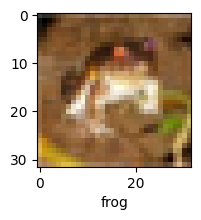

In [9]:
plot_sample(train_images,train_labels,0)

In [10]:
# Normalizing the training and testing images
train_images = train_images / 255.0
test_images = test_images / 255.0  

In [11]:
## Build the ANN model
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])


ann_model.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

ann_model.fit(train_images,train_labels,epochs=5)

Epoch 1/5


2023-12-15 05:43:09.755250: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 60s 38ms/step - loss: 1.8071 - accuracy: 0.3576
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6225 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5415 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4831 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4337 - accuracy: 0.4955


In [12]:
## If our data is one Hot encoded then we use categorical_crossentropy
## If our data is labels then we use sparse_categorical_crossentropy


from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann_model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_labels, y_pred_classes))

313/313 [==============================] - 4s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.40      0.50      1000
           1       0.72      0.41      0.53      1000
           2       0.39      0.33      0.36      1000
           3       0.35      0.22      0.27      1000
           4       0.48      0.33      0.39      1000
           5       0.29      0.54      0.38      1000
           6       0.50      0.55      0.53      1000
           7       0.45      0.65      0.53      1000
           8       0.43      0.79      0.56      1000
           9       0.72      0.33      0.46      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.45     10000
weighted avg       0.50      0.45      0.45     10000



In [13]:
## Creating a cnn model for the image classification

cnn_model = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [14]:
cnn_model.compile(
    optimizer='adam',          
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])   

In [15]:
cnn_model.fit(train_images,train_labels,epochs=5)

Epoch 1/5


2023-12-15 05:48:05.600791: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 34s 21ms/step - loss: 1.4587 - accuracy: 0.4778
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1153 - accuracy: 0.6091
Epoch 3/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9839 - accuracy: 0.6573
Epoch 4/5
1563/1563 [==============================] - 34s 21ms/step - loss: 0.8998 - accuracy: 0.6858
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8346 - accuracy: 0.7104


In [16]:
# cnn_model_1=models.Sequential([
#     #cnn
#     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
#     layers.MaxPooling2D((2,2)),

#     ## We can add more cnn layers to improve the accuracy
#     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
#     layers.MaxPooling2D((2,2)),

#     #dense
#     layers.Flatten(),
#     layers.Dense(64,activation='relu'),
#     layers.Dense(10,activation='softmax')
# ])

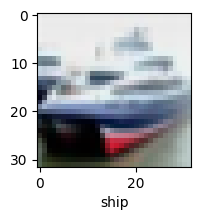

In [17]:
plot_sample(test_images,test_labels,1)

In [18]:
test_images.shape

(10000, 32, 32, 3)

In [19]:
test_labels.shape

(10000,)

In [20]:
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
## to convert the label to one dimension array we use reshape
# test_labels = test_labels.reshape(-1,)

In [22]:
y_pred = cnn_model.predict(test_images)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[4.70022717e-03, 9.77819320e-04, 1.84534155e-02, 4.56398964e-01,
        8.70936725e-04, 3.90529990e-01, 6.27745613e-02, 1.02477461e-04,
        6.13665953e-02, 3.82481236e-03],
       [1.20307375e-02, 6.81927726e-02, 1.75687557e-04, 4.89277818e-06,
        5.08677513e-05, 5.06400374e-06, 8.46795785e-07, 1.79696826e-06,
        9.18883324e-01, 6.54111034e-04],
       [7.66301006e-02, 8.45541358e-02, 2.40479456e-03, 2.92464672e-03,
        3.34635796e-03, 1.75363210e-03, 3.86755215e-04, 2.46675219e-03,
        7.88459361e-01, 3.70734259e-02],
       [7.42343187e-01, 7.41281807e-02, 8.65971018e-03, 4.86520468e-04,
        6.73142448e-03, 8.34743914e-05, 1.37819606e-03, 8.91637028e-05,
        1.65682837e-01, 4.17217932e-04],
       [6.79936193e-06, 3.69203804e-06, 2.08360590e-02, 1.36722149e-02,
        5.95717669e-01, 1.88549922e-03, 3.67764831e-01, 4.35397351e-06,
        1.02740902e-04, 6.06905087e-06]], dtype=float32)

In [23]:
## Each element in the y_pred is a array of 10 elements
## that is the probability of the image belonging to each class
## We need to find the index of the max probability
## We can use argmax to find the index of the max probability

k=np.argmax(y_pred[0])
y_pred_classes = [np.argmax(element) for element in y_pred] 
y_pred_classes[:5]

[3, 8, 8, 0, 4]

In [26]:
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [28]:
class_names[y_pred_classes[1]]

'ship'

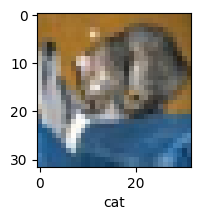

In [29]:
plot_sample(test_images,test_labels,0)

In [30]:
class_names[y_pred_classes[0]]

'cat'

In [31]:
print("Classification Report: \n", classification_report(test_labels, y_pred_classes))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      1000
           1       0.83      0.80      0.81      1000
           2       0.58      0.60      0.59      1000
           3       0.64      0.32      0.43      1000
           4       0.62      0.64      0.63      1000
           5       0.54      0.67      0.60      1000
           6       0.77      0.76      0.77      1000
           7       0.76      0.74      0.75      1000
           8       0.73      0.82      0.77      1000
           9       0.72      0.83      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

